# Q&A Activity Question Week -10
Do the following on the dataset
1. Load the data into the pandas environment and identify some basic details of the
dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10. Do the standard scaling on the feature performance score.

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

### 1.Load the dataset and identify some basic details of the dataset.

In [2]:
data=pd.read_csv('employee.csv')

In [3]:
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [5]:
data.shape

(9, 7)

### 2. Reset the index with "name" as the index.

In [6]:
data.set_index('name', inplace=True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3. Select rows for specific names Jack Morgan and Josh wills.

In [7]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”.

In [8]:
datagrp = data.groupby('department')

In [9]:
finance = datagrp.get_group('Finance')
finance

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


In [10]:
sales = datagrp.get_group('Sales')
sales

,age,income,gender,department,grade,performance_score
name,,,,,,
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Display employee who has more than 700 performance score.

In [11]:
data2 = data[data['performance_score']>700].index
for i in data2:
    print(i)

Allen Smith
Dheeraj Patel
Josh Wills
Leo Duck


### 6. Display employee who has more than 500 and less than 700 performance score.

In [12]:
data3 = data[(data['performance_score']>500) & (data['performance_score']<700)].index
for i in data3:
    print(i)

S Kumar
Jack Morgan
Ying Chin
Satyam Sharma


### 7. Check and handle missing values in the dataset.

In [13]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [14]:
data['gender'].value_counts()

F    5
M    2
Name: gender, dtype: int64

In [15]:
data['gender'].fillna(data['gender'].mode()[0],inplace=True) #filling the null values in 'gender' with the mode.

In [16]:
data["age"].fillna(data['age'].median(),inplace = True) #filling the null values in 'age' with the median.

In [17]:
data.groupby('grade')['income'].median()

grade
G0    16000.0
G2    38500.0
G3    62000.0
G4    98000.0
Name: income, dtype: float64

In [18]:
#filling the null values in 'income' with the median.
for i in ['income']:
    data[i]=data[i].fillna(data[data['grade']=='G3']['income'].median()) #since the null in 'gender' corresponds to grade G3

In [19]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,62000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,62000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [20]:
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

### All the null values have been handled.

### 8. Check the outliers and handle outliers in performance score using Percentiles.

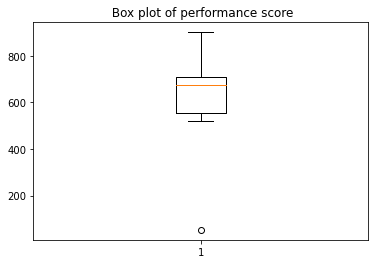

In [21]:
# boxplot of 'performance score'
plt.boxplot(data['performance_score'])
plt.title(' Box plot of performance score');

In [22]:
Q1 = np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2 = np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3 = np.percentile(data['performance_score'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [23]:
data['performance_score'].median()

674.0

In [24]:
IQR=Q3-Q1
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('Lower limit is : ', low_limit)
print('Upper limit is : ', upper_limit)

Lower limit is :  323.5
Upper limit is :  943.5


In [25]:
outlier=[]
for x in data['performance_score']:
    if (x>upper_limit) or (x<low_limit):
        outlier.append(x)

In [26]:
outlier

[53]

In [27]:
ind1=data['performance_score']<low_limit
data.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [28]:
data.drop(['James Authur'],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x17f089e71c0>,
 'caps': [<matplotlib.lines.Line2D at 0x17f089e7880>,
 'boxes': [<matplotlib.lines.Line2D at 0x17f089dde20>],
 'medians': [<matplotlib.lines.Line2D at 0x17f089e7f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x17f089ef2e0>],
 'means': []}

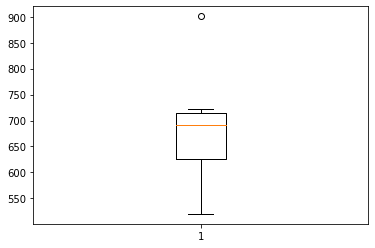

In [29]:
plt.boxplot(data['performance_score'])

### No more outliers in 'performance score'

### 9. Check the gender column and do Dummy encoding.

In [30]:
dummydata = pd.get_dummies(data['gender'])
dummydata

,F,M
name,,
Allen Smith,1,0
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,1,0
Josh Wills,1,0
Leo Duck,0,1


In [31]:
data_new=pd.concat([data, dummydata], axis=1) #concatenating data 5 with binary values with original dataset.
data_new

,age,income,gender,department,grade,performance_score,F,M
name,,,,,,,,
Allen Smith,45.0,62000.0,F,Operations,G3,723,1,0
S Kumar,45.0,16000.0,F,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,M,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,F,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,F,Sales,G3,649,1,0
Josh Wills,54.0,52000.0,F,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,M,Sales,G4,709,0,1


### Gender, originally a categorical data is thus changed to numerical data by encoding

### 10. Do the standard scaling on the feature performance score.

In [32]:
data.columns

Index(['age', 'income', 'gender', 'department', 'grade', 'performance_score'], dtype='object')

In [33]:
x=data.drop(['age', 'income', 'gender','department', 'grade'], axis=1)
x

,performance_score
name,
Allen Smith,723
S Kumar,520
Jack Morgan,674
Ying Chin,556
Dheeraj Patel,711
Satyam Sharma,649
Josh Wills,901
Leo Duck,709


In [34]:
x.describe()

,performance_score
count,8.00000
mean,680.37500
std,116.16729
min,520.00000
25%,625.75000
50%,691.50000
75%,714.00000
max,901.00000


In [35]:
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(x)
x=pd.DataFrame(x)

In [36]:
x.describe()

,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
